In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv('D:\\data\\train.csv')

In [47]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [52]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [51]:
df=df.dropna()

In [54]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [56]:
df['content']=df['author']+' '+df['title']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8104\3605542964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content']=df['author']+' '+df['title']


In [57]:
df.columns

Index(['id', 'title', 'author', 'text', 'label', 'content'], dtype='object')

In [58]:
df.drop(['id', 'text','title','author'], axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8104\1654499964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id', 'text','title','author'], axis=1, inplace=True)


In [59]:
df

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...
20795,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [22]:
! pip install nltk

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 262.1/262.1 KB 1.6 MB/s eta 0:00:00


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
def process(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
        
            
        
    

In [60]:
df['ftext']=df['content'].apply(process)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8104\1229448951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ftext']=df['content'].apply(process)


In [61]:
df

,label,content,ftext
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel flynn flynn hillari clinton big woman c...
2,1,Consortiumnews.com Why the Truth Might Get You...,truth might get fire
3,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilian kill singl us airs...
4,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...
...,...,...,...
20795,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,jerom hudson rapper trump poster child white s...
20796,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",benjamin hoffman playoff schedul matchup odd n...
20797,0,Michael J. de la Merced and Rachel Abrams Macy...,michael de la merc rachel abram maci said rece...
20798,1,"Alex Ansary NATO, Russia To Hold Parallel Exer...",alex ansari nato russia hold parallel exercis ...


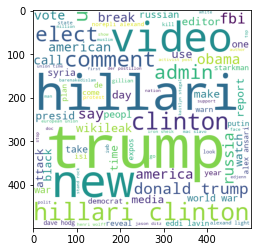

In [62]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(df[df['label']==1]['ftext'].str.cat(sep=" "))
plt.imshow(spam_wc)

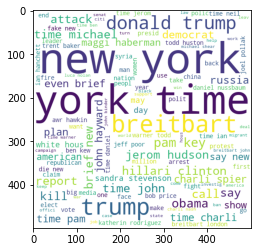

In [63]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(df[df['label']==0]['ftext'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [66]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [68]:
X=cv.fit_transform(df['ftext']).toarray()
y=df['label'].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [71]:
model.score(X_train,y_train)

0.9985643970467596

In [72]:
model.score(X_test,y_test)

0.9893355209187858

In [73]:
y_pred=model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [75]:
confusion_matrix(y_pred,y_test)

array([[2053,   10],
       [  29, 1565]], dtype=int64)

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2063
           1       0.99      0.98      0.99      1594

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



In [77]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0)

In [78]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [79]:
model1.score(X_train,y_train)

1.0

In [80]:
model1.score(X_test,y_test)

0.9931637954607602

In [81]:
y_pred1=model1.predict(X_test)

In [82]:
confusion_matrix(y_pred1,y_test)

array([[2071,   14],
       [  11, 1561]], dtype=int64)

In [83]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2085
           1       0.99      0.99      0.99      1572

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



In [85]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(model1,open('modelf.pkl','wb'))